In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing


### 1. Away_Def_Pass.csv

In [2]:
Away_Def_Pass = pd.read_csv("Away_Def_Pass.csv")
Away_Def_Pass = Away_Def_Pass.set_index('game_id')
Away_Def_Pass

,Away_def_pass_1,Away_def_pass_2,Away_def_pass_3,Away_def_pass_4,Away_def_pass_5,Away_def_pass_6,Away_def_pass_7,Away_def_pass_8,Away_def_pass_9,Away_def_pass_10,...,Away_def_pass_79,Away_def_pass_80,Away_def_pass_81,Away_def_pass_82,Away_def_pass_83,Away_def_pass_84,Away_def_pass_85,Away_def_pass_86,Away_def_pass_87,Away_def_pass_88
game_id,,,,,,,,,,,,,,,,,,,,,
2009091000,603,401,170,0.665008,4361,4595,2363.0,7.232172,10.875312,25.652941,...,-8.330412,-2.096338,-0.003477,0.015546,0.036671,-0.049002,0.520730,0.482587,0.517413,0.472637
2009091312,537,341,166,0.635009,3812,4246,1952.0,7.098696,11.178886,22.963855,...,-7.692602,-2.759874,-0.005139,0.014465,0.029715,-0.046341,0.513966,0.469274,0.500931,0.450652
2009091309,544,371,167,0.681985,4370,4204,2278.0,8.033088,11.778976,26.167665,...,-8.330118,-0.689662,-0.001268,0.020594,0.045751,-0.049881,0.549632,0.523897,0.534926,0.516544
2009091306,572,344,169,0.601399,3908,4651,1945.0,6.832168,11.360465,23.124260,...,-11.092685,-4.396846,-0.007687,0.019465,0.039620,-0.065637,0.480769,0.440559,0.459790,0.403846
2009092010,503,259,173,0.514911,2747,4520,1455.0,5.461233,10.606178,15.878613,...,-13.266670,-8.676596,-0.017250,0.017722,0.026532,-0.076686,0.397614,0.357853,0.387674,0.345924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010091212,557,329,168,0.590664,3937,4458,1972.0,7.068223,11.966565,23.434524,...,-10.875109,-4.324028,-0.007763,0.019912,0.038995,-0.064733,0.511670,0.454219,0.486535,0.425494
2010091205,573,370,156,0.645724,3904,4437,2125.0,6.813264,10.551351,25.025641,...,-13.143369,-7.062657,-0.012326,0.016434,0.038979,-0.084252,0.511344,0.485166,0.506108,0.471204
2010091202,566,343,182,0.606007,3842,4684,2127.0,6.787986,11.201166,21.109890,...,-12.081021,-6.392483,-0.011294,0.016585,0.031256,-0.066379,0.468198,0.443463,0.462898,0.432862


Text(0, 0.5, 'The Cumulative Explained Variance')

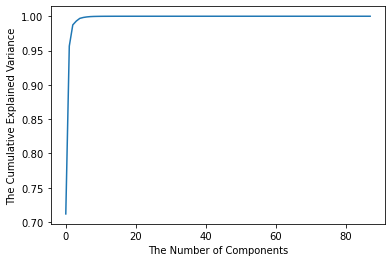

In [3]:
pca_dimension_kept = PCA().fit(Away_Def_Pass)
plt.plot(np.cumsum(pca_dimension_kept.explained_variance_ratio_))
plt.xlabel('The Number of Components')
plt.ylabel('The Cumulative Explained Variance')

In [4]:
vec_explnd_var_ratio = pca_dimension_kept.explained_variance_ratio_.cumsum()
itemindex = np.where(vec_explnd_var_ratio >= 0.95)
dimension_kept = itemindex[0][0]+1
print("The number of components which has 95% cumulative explained variance is:", dimension_kept)

The number of components which has 95% cumulative explained variance is: 2


In [5]:
pca_dimension_redc = PCA(n_components=dimension_kept)
pca_dimension_redc.fit(Away_Def_Pass)
Away_Def_Pass_PCA = pca_dimension_redc.transform(Away_Def_Pass)
print("The size of this transformed dataset is:", Away_Def_Pass_PCA.shape)
print(Away_Def_Pass_PCA)

The size of this transformed dataset is: (2304, 2)
[[ 246.93851705 -383.90412955]
 [-452.80925873  -62.7277289 ]
 [ -98.30992479 -618.7589327 ]
 ...
 [ -19.89195534  148.04596678]
 [ -36.9889898     3.33586443]
 [-486.02669158   85.73172082]]


### 2. Away_Def_Rush.csv

In [6]:
Away_Def_Rush = pd.read_csv("Away_Def_Rush.csv")
Away_Def_Rush = Away_Def_Rush.set_index('game_id')
Away_Def_Rush

,Away_def_rushing_1,Away_def_rushing_2,Away_def_rushing_3,Away_def_rushing_4,Away_def_rushing_5,Away_def_rushing_6,Away_def_rushing_7,Away_def_rushing_8,Away_def_rushing_9,Away_def_rushing_10,...,Away_def_rushing_17,Away_def_rushing_18,Away_def_rushing_19,Away_def_rushing_20,Away_def_rushing_21,Away_def_rushing_22,Away_def_rushing_23,Away_def_rushing_24,Away_def_rushing_25,Away_def_rushing_26
game_id,,,,,,,,,,,,,,,,,,,,,
2009092013,385,153,2.516340,1688.0,4.384416,11.032680,7,16,2.285714,-25.693137,...,0.104575,-0.167929,-0.405872,-0.002653,0.420779,-0.001054,0.466777,2.049885,0.005324,0.013398
2009092100,351,150,2.340000,1405.0,4.002849,9.366667,8,5,0.625000,-69.060130,...,0.033333,-0.460401,-1.413078,-0.009421,0.370370,-0.004026,0.390374,-2.947178,-0.008397,-0.019648
2009091311,435,162,2.685185,2029.0,4.664368,12.524691,10,19,1.900000,-37.434418,...,0.117284,-0.231077,0.083658,0.000516,0.434483,0.000192,0.506019,-0.401512,-0.000923,-0.002478
2009092014,358,140,2.557143,1459.0,4.075419,10.421429,8,7,0.875000,-48.637183,...,0.050000,-0.347408,-1.103492,-0.007882,0.354749,-0.003082,0.423124,-1.939467,-0.005418,-0.013853
2009092006,411,151,2.721854,1592.0,3.873479,10.543046,6,11,1.833333,-53.588808,...,0.072848,-0.354893,-1.164296,-0.007711,0.355231,-0.002833,0.438845,-2.196430,-0.005344,-0.014546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010091914,399,142,2.809859,1849.0,4.634085,13.021127,6,11,1.833333,-0.681594,...,0.077465,-0.004800,0.480158,0.003381,0.448622,0.001203,0.533344,2.436229,0.006106,0.017157
2010091301,443,153,2.895425,2014.0,4.546275,13.163399,4,22,5.500000,3.917681,...,0.143791,0.025606,0.037111,0.000243,0.401806,0.000084,0.502258,2.979927,0.006727,0.019477
2010091900,402,163,2.466258,1515.0,3.768657,9.294479,9,13,1.444444,-60.133492,...,0.079755,-0.368917,-1.395372,-0.008561,0.343284,-0.003471,0.400362,-0.668107,-0.001662,-0.004099


Text(0, 0.5, 'The Cumulative Explained Variance')

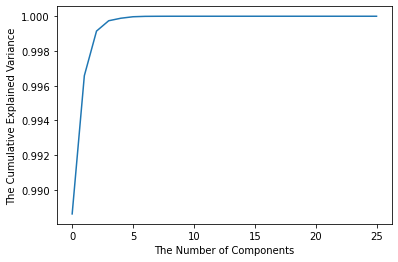

In [7]:
pca_dimension_kept = PCA().fit(Away_Def_Rush)
plt.plot(np.cumsum(pca_dimension_kept.explained_variance_ratio_))
plt.xlabel('The Number of Components')
plt.ylabel('The Cumulative Explained Variance')

In [8]:
vec_explnd_var_ratio = pca_dimension_kept.explained_variance_ratio_.cumsum()
itemindex = np.where(vec_explnd_var_ratio >= 0.95)
dimension_kept = itemindex[0][0]+1
print("The number of components which has 95% cumulative explained variance is:", dimension_kept)

The number of components which has 95% cumulative explained variance is: 1


In [9]:
pca_dimension_redc = PCA(n_components=dimension_kept)
pca_dimension_redc.fit(Away_Def_Rush)
Away_Def_Rush_PCA = pca_dimension_redc.transform(Away_Def_Rush)
print("The size of this transformed dataset is:", Away_Def_Rush_PCA.shape)
print(Away_Def_Rush_PCA)

The size of this transformed dataset is: (2304, 1)
[[-147.41087438]
 [-434.5884289 ]
 [ 196.00379021]
 ...
 [-318.60959172]
 [-415.15029835]
 [ 229.93014299]]


### 3. Away_Pass.csv

In [10]:
Away_Pass = pd.read_csv("Away_Pass.csv")
Away_Pass = Away_Pass.set_index('game_id')
Away_Pass

,index,Away_pass_1,Away_pass_2,Away_pass_3,Away_pass_4,Away_pass_5,Away_pass_6,Away_pass_7,Away_pass_8,Away_pass_9,...,Away_pass_79,Away_pass_80,Away_pass_81,Away_pass_82,Away_pass_83,Away_pass_84,Away_pass_85,Away_pass_86,Away_pass_87,Away_pass_88
game_id,,,,,,,,,,,,,,,,,,,,,
2009091000,27,476,271,157,0.569328,3111,4226,1790,6.535714,11.479705,...,-12.497881,-7.777101,-0.016338,0.017420,0.030069,-0.079604,0.434874,0.390756,0.415966,0.369748
2009091304,10,553,377,165,0.681736,4443,4308,2264,8.034358,11.785146,...,-7.710508,-2.102146,-0.003801,0.014876,0.033990,-0.046730,0.558770,0.518987,0.555154,0.508137
2009091307,5,581,317,176,0.545611,3526,4799,1769,6.068847,11.123028,...,-11.521765,-6.598837,-0.011358,0.015530,0.027971,-0.065465,0.445783,0.407917,0.414802,0.370052
2009091308,12,548,347,162,0.633212,4493,4163,2188,8.198905,12.948127,...,-11.268720,-4.476072,-0.008168,0.019575,0.041930,-0.069560,0.516423,0.479927,0.490876,0.447080
2009091305,31,393,211,160,0.536896,2621,3641,1537,6.669211,12.421801,...,-11.983447,-8.176571,-0.020806,0.018042,0.023793,-0.074897,0.440204,0.394402,0.427481,0.384224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017123110,275,535,388,154,0.725234,4369,3422,1969,8.166355,11.260309,...,-7.396476,1.491097,0.002787,0.022906,0.057712,-0.048029,0.609346,0.568224,0.598131,0.555140
2017123104,287,476,289,159,0.607143,3100,4144,1778,6.512605,10.726644,...,-10.291004,-5.065237,-0.010641,0.018082,0.032866,-0.064723,0.436975,0.401261,0.415966,0.380252
2017123115,261,598,339,183,0.566890,4038,5801,2517,6.752508,11.911504,...,-15.291621,-9.216935,-0.015413,0.017919,0.033195,-0.083561,0.429766,0.396321,0.397993,0.361204


Text(0, 0.5, 'The Cumulative Explained Variance')

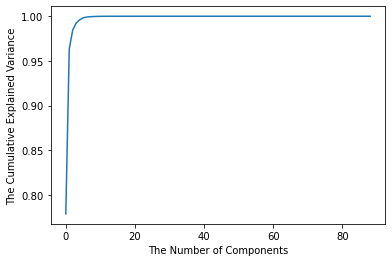

In [11]:
pca_dimension_kept = PCA().fit(Away_Pass)
plt.plot(np.cumsum(pca_dimension_kept.explained_variance_ratio_))
plt.xlabel('The Number of Components')
plt.ylabel('The Cumulative Explained Variance')

In [12]:
vec_explnd_var_ratio = pca_dimension_kept.explained_variance_ratio_.cumsum()
itemindex = np.where(vec_explnd_var_ratio >= 0.95)
dimension_kept = itemindex[0][0]+1
print("The number of components which has 95% cumulative explained variance is:", dimension_kept)

The number of components which has 95% cumulative explained variance is: 2


In [13]:
pca_dimension_redc = PCA(n_components=dimension_kept)
pca_dimension_redc.fit(Away_Pass)
Away_Pass_PCA = pca_dimension_redc.transform(Away_Pass)
print("The size of this transformed dataset is:", Away_Pass_PCA.shape)
print(Away_Pass_PCA)

The size of this transformed dataset is: (2304, 2)
[[-947.2648291  -383.21639957]
 [ 131.23377957  600.23559754]
 [-311.90383419 -524.29399792]
 ...
 [ 996.30366086 -800.87190783]
 [-856.09526056 -205.61915024]
 [-873.05865535 -135.86471412]]


### 4. Home_Def_Pass.csv

In [14]:
Home_Def_Pass = pd.read_csv("Home_Def_Pass.csv")
Home_Def_Pass = Home_Def_Pass.set_index('game_id')
Home_Def_Pass

,Home_def_pass_1,Home_def_pass_2,Home_def_pass_3,Home_def_pass_4,Home_def_pass_5,Home_def_pass_6,Home_def_pass_7,Home_def_pass_8,Home_def_pass_9,Home_def_pass_10,...,Home_def_pass_79,Home_def_pass_80,Home_def_pass_81,Home_def_pass_82,Home_def_pass_83,Home_def_pass_84,Home_def_pass_85,Home_def_pass_86,Home_def_pass_87,Home_def_pass_88
game_id,,,,,,,,,,,,,,,,,,,,,
2009091301,550,321,158,0.583636,3766,4953,2319.0,6.847273,11.732087,23.835443,...,-15.857794,-9.329618,-0.016963,0.020337,0.041318,-0.100366,0.436364,0.389091,0.436364,0.380000
2009092007,519,313,169,0.603083,4143,4029,1898.0,7.982659,13.236422,24.514793,...,-11.502120,-4.817158,-0.009282,0.021358,0.039556,-0.068060,0.516378,0.464355,0.504817,0.441233
2009091303,570,329,169,0.577193,4064,4879,2029.0,7.129825,12.352584,24.047337,...,-13.106021,-8.543829,-0.014989,0.013867,0.026995,-0.077550,0.480702,0.435088,0.442105,0.398246
2009092014,478,302,166,0.631799,3503,4309,1980.0,7.328452,11.599338,21.102410,...,-12.494552,-7.325501,-0.015325,0.017116,0.031139,-0.075268,0.476987,0.441423,0.451883,0.418410
2009091300,547,344,162,0.628885,3685,4198,2047.0,6.736746,10.712209,22.746914,...,-10.409050,-5.142378,-0.009401,0.015310,0.032510,-0.064253,0.495430,0.458867,0.478976,0.442413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010091908,549,371,161,0.675774,4306,4803,2568.0,7.843352,11.606469,26.745342,...,-10.407664,-3.238942,-0.005900,0.019323,0.044526,-0.064644,0.477231,0.455373,0.468124,0.440801
2010091910,527,340,167,0.645161,3807,4250,2067.0,7.223909,11.197059,22.796407,...,-9.809620,-3.673290,-0.006970,0.018048,0.036744,-0.058740,0.512334,0.476281,0.510436,0.468691
2010091912,551,325,167,0.589837,3638,5013,2215.0,6.602541,11.193846,21.784431,...,-15.297029,-10.298590,-0.018691,0.015380,0.029931,-0.091599,0.437387,0.408348,0.417423,0.384755


Text(0, 0.5, 'The Cumulative Explained Variance')

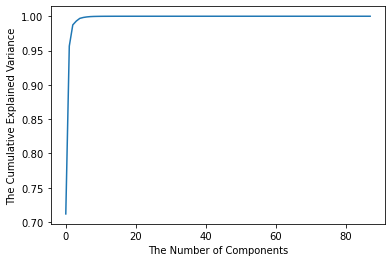

In [15]:
pca_dimension_kept = PCA().fit(Home_Def_Pass)
plt.plot(np.cumsum(pca_dimension_kept.explained_variance_ratio_))
plt.xlabel('The Number of Components')
plt.ylabel('The Cumulative Explained Variance')

In [16]:
vec_explnd_var_ratio = pca_dimension_kept.explained_variance_ratio_.cumsum()
itemindex = np.where(vec_explnd_var_ratio >= 0.95)
dimension_kept = itemindex[0][0]+1
print("The number of components which has 95% cumulative explained variance is:", dimension_kept)

The number of components which has 95% cumulative explained variance is: 2


In [17]:
pca_dimension_redc = PCA(n_components=dimension_kept)
pca_dimension_redc.fit(Home_Def_Pass)
Home_Def_Pass_PCA = pca_dimension_redc.transform(Home_Def_Pass)
print("The size of this transformed dataset is:", Home_Def_Pass_PCA.shape)
print(Home_Def_Pass_PCA)

The size of this transformed dataset is: (2304, 2)
[[ 224.96875838  312.42156621]
 [-478.69210715 -422.1111661 ]
 [ 216.00063823  151.22426662]
 ...
 [ 175.37985205  489.8583802 ]
 [-611.86890788 -142.8382604 ]
 [ -93.76902408  238.73846017]]


### 5. Home_Def_Rush.csv

In [18]:
Home_Def_Rush = pd.read_csv("Home_Def_Rush.csv")
Home_Def_Rush = Home_Def_Rush.set_index('game_id')
Home_Def_Rush

,Home_def_rushing_1,Home_def_rushing_2,Home_def_rushing_3,Home_def_rushing_4,Home_def_rushing_5,Home_def_rushing_6,Home_def_rushing_7,Home_def_rushing_8,Home_def_rushing_9,Home_def_rushing_10,...,Home_def_rushing_17,Home_def_rushing_18,Home_def_rushing_19,Home_def_rushing_20,Home_def_rushing_21,Home_def_rushing_22,Home_def_rushing_23,Home_def_rushing_24,Home_def_rushing_25,Home_def_rushing_26
game_id,,,,,,,,,,,,,,,,,,,,,
2009092011,365,143,2.552448,1441.0,3.947945,10.076923,4,7,1.750000,-19.233558,...,0.048951,-0.134500,-1.093542,-0.007647,0.372603,-0.002996,0.439245,-0.686482,-0.001881,-0.004801
2009091305,493,161,3.062112,2339.0,4.744422,14.527950,8,15,1.875000,-6.195270,...,0.093168,-0.038480,0.655960,0.004074,0.444219,0.001331,0.538908,1.107720,0.002247,0.006880
2009091310,431,151,2.854305,1965.0,4.559165,13.013245,3,20,6.666667,30.512692,...,0.132450,0.202071,1.792443,0.011870,0.443155,0.004159,0.609829,6.758316,0.015681,0.044757
2009091308,514,164,3.134146,2574.0,5.007782,15.695122,7,16,2.285714,-0.582315,...,0.097561,-0.003551,1.027486,0.006265,0.480545,0.001999,0.558981,0.953869,0.001856,0.005816
2009092009,388,154,2.519481,1721.0,4.435567,11.175325,11,18,1.636364,-34.261247,...,0.116883,-0.222476,0.049068,0.000319,0.381443,0.000126,0.502818,3.075574,0.007927,0.019971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010091907,426,145,2.937931,1922.0,4.511737,13.255172,9,18,2.000000,-35.390182,...,0.124138,-0.244070,-0.100028,-0.000690,0.403756,-0.000235,0.494656,-1.188659,-0.002790,-0.008198
2010091911,412,152,2.710526,1790.0,4.344660,11.776316,12,16,1.333333,-37.249571,...,0.105263,-0.245063,-0.265003,-0.001743,0.412621,-0.000643,0.480555,0.002779,0.000007,0.000018
2010091901,443,161,2.751553,1864.0,4.207675,11.577640,9,16,1.777778,-31.849033,...,0.099379,-0.197820,-0.344189,-0.002138,0.390519,-0.000777,0.478552,-0.435673,-0.000983,-0.002706


Text(0, 0.5, 'The Cumulative Explained Variance')

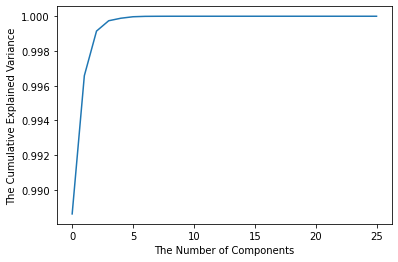

In [19]:
pca_dimension_kept = PCA().fit(Home_Def_Rush)
plt.plot(np.cumsum(pca_dimension_kept.explained_variance_ratio_))
plt.xlabel('The Number of Components')
plt.ylabel('The Cumulative Explained Variance')

In [20]:
vec_explnd_var_ratio = pca_dimension_kept.explained_variance_ratio_.cumsum()
itemindex = np.where(vec_explnd_var_ratio >= 0.95)
dimension_kept = itemindex[0][0]+1
print("The number of components which has 95% cumulative explained variance is:", dimension_kept)

The number of components which has 95% cumulative explained variance is: 1


In [21]:
pca_dimension_redc = PCA(n_components=dimension_kept)
pca_dimension_redc.fit(Home_Def_Rush)
Home_Def_Rush_PCA = pca_dimension_redc.transform(Home_Def_Rush)
print("The size of this transformed dataset is:", Home_Def_Rush_PCA.shape)
print(Home_Def_Rush_PCA)

The size of this transformed dataset is: (2304, 1)
[[-394.43013519]
 [ 511.95280961]
 [ 135.88945939]
 ...
 [  33.78380521]
 [-128.40736034]
 [  -7.65087249]]


### 6. Home_Pass.csv

In [22]:
Home_Pass = pd.read_csv("Home_Pass.csv")
Home_Pass = Home_Pass.set_index('game_id')
Home_Pass

,Home_pass_1,Home_pass_2,Home_pass_3,Home_pass_4,Home_pass_5,Home_pass_6,Home_pass_7,Home_pass_8,Home_pass_9,Home_pass_10,...,Home_pass_79,Home_pass_80,Home_pass_81,Home_pass_82,Home_pass_83,Home_pass_84,Home_pass_85,Home_pass_86,Home_pass_87,Home_pass_88
game_id,,,,,,,,,,,,,,,,,,,,,
2009091000,535,351,166,0.656075,4497,4868,2619,8.405607,12.811966,27.090361,...,-12.219204,-4.494036,-0.008400,0.022009,0.046537,-0.073610,0.553271,0.514019,0.547664,0.508411
2009091304,442,219,162,0.495475,2296,3719,1197,5.194570,10.484018,14.172840,...,-10.980935,-7.274601,-0.016458,0.016924,0.022879,-0.067784,0.429864,0.350679,0.427602,0.328054
2009091307,543,378,161,0.696133,4492,4278,2418,8.272560,11.883598,27.900621,...,-7.430660,0.550597,0.001014,0.021114,0.049573,-0.046153,0.539595,0.502762,0.510129,0.478821
2009091308,524,280,182,0.534351,3118,4642,1980,5.950382,11.135714,17.131868,...,-13.988213,-10.272138,-0.019603,0.013272,0.020418,-0.076858,0.400763,0.366412,0.368321,0.328244
2009091305,590,399,165,0.676271,4805,4534,2630,8.144068,12.042607,29.121212,...,-10.557497,-3.277869,-0.005556,0.018245,0.044119,-0.063985,0.557627,0.520339,0.522034,0.489831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017123110,607,379,165,0.624382,4608,6154,2947,7.591433,12.158311,27.927273,...,-13.683096,-9.022296,-0.014864,0.012298,0.028247,-0.082928,0.433278,0.406919,0.413509,0.397035
2017123104,602,371,174,0.616279,3823,4884,2049,6.350498,10.304582,21.971264,...,-10.444361,-4.459579,-0.007408,0.016131,0.034395,-0.060025,0.480066,0.430233,0.440199,0.395349
2017123115,560,343,174,0.612500,4014,5415,2364,7.167857,11.702624,23.068966,...,-15.023168,-8.138985,-0.014534,0.020071,0.039564,-0.086340,0.437500,0.419643,0.417857,0.400000


Text(0, 0.5, 'The Cumulative Explained Variance')

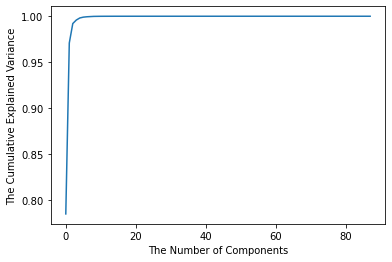

In [23]:
pca_dimension_kept = PCA().fit(Home_Pass)
plt.plot(np.cumsum(pca_dimension_kept.explained_variance_ratio_))
plt.xlabel('The Number of Components')
plt.ylabel('The Cumulative Explained Variance')

In [24]:
vec_explnd_var_ratio = pca_dimension_kept.explained_variance_ratio_.cumsum()
itemindex = np.where(vec_explnd_var_ratio >= 0.95)
dimension_kept = itemindex[0][0]+1
print("The number of components which has 95% cumulative explained variance is:", dimension_kept)

The number of components which has 95% cumulative explained variance is: 2


In [25]:
pca_dimension_redc = PCA(n_components=dimension_kept)
pca_dimension_redc.fit(Home_Pass)
Home_Pass_PCA = pca_dimension_redc.transform(Home_Pass)
print("The size of this transformed dataset is:", Home_Pass_PCA.shape)
print(Home_Pass_PCA)

The size of this transformed dataset is: (2304, 2)
[[  686.21077825   248.99553656]
 [-2047.81643328  -634.83537246]
 [  200.20707943   667.4635015 ]
 ...
 [  656.75825827  -519.18292903]
 [  288.04167932    75.85822626]
 [-1131.73587231     7.66149449]]


### 7. Home_Rush.csv

In [26]:
Home_Rush = pd.read_csv("Home_Rush.csv")
Home_Rush = Home_Rush.set_index('game_id')
Home_Rush

,Home_rushing_1,Home_rushing_2,Home_rushing_3,Home_rushing_4,Home_rushing_5,Home_rushing_6,Home_rushing_7,Home_rushing_8,Home_rushing_9,Home_rushing_10,...,Home_rushing_17,Home_rushing_18,Home_rushing_19,Home_rushing_20,Home_rushing_21,Home_rushing_22,Home_rushing_23,Home_rushing_24,Home_rushing_25,Home_rushing_26
game_id,,,,,,,,,,,,,,,,,,,,,
2009092008,413,153,2.699346,1807,4.375303,11.810458,6,10,1.666667,-29.305521,...,0.065359,-0.191539,-0.190895,-0.001248,0.416465,-0.000462,0.488974,-0.530701,-0.001285,-0.003469
2009091305,495,159,3.113208,2093,4.228283,13.163522,7,12,1.714286,-43.513581,...,0.075472,-0.273670,-0.033650,-0.000212,0.373737,-0.000068,0.498284,-0.836317,-0.001690,-0.005260
2009091302,452,146,3.095890,2124,4.699115,14.547945,6,22,3.666667,6.091349,...,0.150685,0.041722,1.068242,0.007317,0.491150,0.002363,0.571204,0.902430,0.001997,0.006181
2009092002,400,159,2.515723,1706,4.265000,10.729560,13,6,0.461538,-51.866750,...,0.037736,-0.326206,-1.051388,-0.006613,0.357500,-0.002628,0.435876,-0.184831,-0.000462,-0.001162
2009092005,407,148,2.750000,1521,3.737101,10.277027,13,13,1.000000,-72.888689,...,0.087838,-0.492491,-1.092653,-0.007383,0.405405,-0.002685,0.425582,-3.737988,-0.009184,-0.025257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010092600,385,141,2.730496,1455,3.779221,10.319149,8,9,1.125000,-40.741012,...,0.063830,-0.288943,-0.856320,-0.006073,0.366234,-0.002224,0.433673,-1.124103,-0.002920,-0.007972
2010092606,354,154,2.298701,1416,4.000000,9.194805,6,4,0.666667,-56.145155,...,0.025974,-0.364579,-1.546307,-0.010041,0.347458,-0.004368,0.392144,-1.164685,-0.003290,-0.007563
2010091900,395,160,2.468750,1637,4.144304,10.231250,7,4,0.571429,-39.848637,...,0.025000,-0.249054,-0.607907,-0.003799,0.397468,-0.001539,0.462268,0.574075,0.001453,0.003588


In [27]:
Home_Rush.replace([np.inf, -np.inf], 0, inplace=True)

Text(0, 0.5, 'The Cumulative Explained Variance')

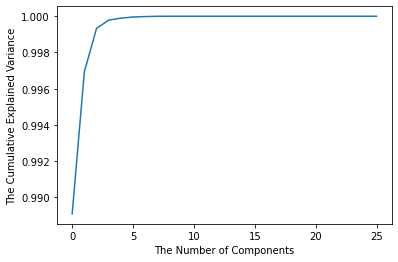

In [28]:
pca_dimension_kept = PCA().fit(Home_Rush)
plt.plot(np.cumsum(pca_dimension_kept.explained_variance_ratio_))
plt.xlabel('The Number of Components')
plt.ylabel('The Cumulative Explained Variance')

In [29]:
vec_explnd_var_ratio = pca_dimension_kept.explained_variance_ratio_.cumsum()
itemindex = np.where(vec_explnd_var_ratio >= 0.95)
dimension_kept = itemindex[0][0]+1
print("The number of components which has 95% cumulative explained variance is:", dimension_kept)

The number of components which has 95% cumulative explained variance is: 1


In [30]:
pca_dimension_redc = PCA(n_components=dimension_kept)
pca_dimension_redc.fit(Home_Rush)
Home_Rush_PCA = pca_dimension_redc.transform(Home_Rush)
print("The size of this transformed dataset is:", Home_Rush_PCA.shape)
print(Home_Rush_PCA)

The size of this transformed dataset is: (2304, 1)
[[ -26.35897983]
 [ 266.50238804]
 [ 294.373138  ]
 ...
 [-197.53808351]
 [ 122.50245762]
 [  48.95558472]]


### 8. Home_Receive.csv

In [31]:
Home_Receive = pd.read_csv("Home_Receive.csv")
Home_Receive = Home_Receive.set_index('game_id')
Home_Receive

,Home_receiving_1,Home_receiving_2,Home_receiving_3,Home_receiving_4,Home_receiving_5,Home_receiving_6,Home_receiving_7,Home_receiving_8,Home_receiving_9,Home_receiving_10,...,Home_receiving_79,Home_receiving_80,Home_receiving_81,Home_receiving_82,Home_receiving_83,Home_receiving_84,Home_receiving_85,Home_receiving_86,Home_receiving_87,Home_receiving_88
game_id,,,,,,,,,,,,,,,,,,,,,
2009092008,535,351,166,3.222892,2.114458,4497,27.090361,1877,12.811966,8.405607,...,-0.073610,0.539454,0.553271,0.514019,0.605607,0.357009,0.547664,0.508411,0.596262,0.351402
2009092014,442,219,162,2.728395,1.351852,2296,14.172840,1054,10.484018,5.194570,...,-0.067784,-0.342074,0.429864,0.350679,0.504525,0.210407,0.427602,0.328054,0.490950,0.205882
2009091312,543,378,161,3.372671,2.347826,4492,27.900621,2072,11.883598,8.272560,...,-0.046153,1.129747,0.539595,0.502762,0.539595,0.335175,0.510129,0.478821,0.550645,0.342541
2009092005,524,280,182,2.879121,1.538462,3118,17.131868,1102,11.135714,5.950382,...,-0.076858,-0.170971,0.400763,0.366412,0.593511,0.269084,0.368321,0.328244,0.587786,0.267176
2009091308,590,399,165,3.575758,2.418182,4805,29.121212,2170,12.042607,8.144068,...,-0.063985,0.532497,0.557627,0.520339,0.569492,0.352542,0.522034,0.489831,0.555932,0.338983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010091209,607,379,165,3.678788,2.296970,4608,27.927273,1645,12.158311,7.591433,...,-0.082928,0.284034,0.433278,0.406919,0.670511,0.373970,0.413509,0.397035,0.650741,0.360791
2010091206,602,371,174,3.459770,2.132184,3823,21.971264,1681,10.304582,6.350498,...,-0.060025,0.206923,0.480066,0.430233,0.526578,0.265781,0.440199,0.395349,0.513289,0.257475
2010091901,560,343,174,3.218391,1.971264,4014,23.068966,1609,11.702624,7.167857,...,-0.086340,0.323260,0.437500,0.419643,0.612500,0.326786,0.417857,0.400000,0.616071,0.328571


In [32]:
Home_Receive.replace([np.inf, -np.inf], 0, inplace=True)

Text(0, 0.5, 'The Cumulative Explained Variance')

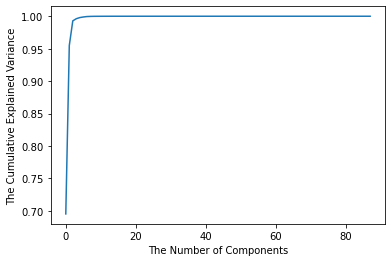

In [33]:
pca_dimension_kept = PCA().fit(Home_Receive)
plt.plot(np.cumsum(pca_dimension_kept.explained_variance_ratio_))
plt.xlabel('The Number of Components')
plt.ylabel('The Cumulative Explained Variance')

In [34]:
vec_explnd_var_ratio = pca_dimension_kept.explained_variance_ratio_.cumsum()
itemindex = np.where(vec_explnd_var_ratio >= 0.95)
dimension_kept = itemindex[0][0]+1
print("The number of components which has 95% cumulative explained variance is:", dimension_kept)

The number of components which has 95% cumulative explained variance is: 2


In [35]:
pca_dimension_redc = PCA(n_components=dimension_kept)
pca_dimension_redc.fit(Home_Receive)
Home_Receive_PCA = pca_dimension_redc.transform(Home_Receive)
print("The size of this transformed dataset is:", Home_Receive_PCA.shape)
print(Home_Receive_PCA)

The size of this transformed dataset is: (2304, 2)
[[-711.05251779   56.93524686]
 [2313.41163984 -492.48697216]
 [-385.1145881   673.96966295]
 ...
 [-493.60663186 -705.84610922]
 [-318.54839082   48.58245871]
 [1187.10111071   98.94416402]]


### 9. Home_Def_Receive.csv

In [36]:
Home_Def_Receive = pd.read_csv("Home_Def_Receive.csv")
Home_Def_Receive = Home_Def_Receive.set_index('game_id')
Home_Def_Receive

,Home_def_receiving_1,Home_def_receiving_2,Home_def_receiving_3,Home_def_receiving_4,Home_def_receiving_5,Home_def_receiving_6,Home_def_receiving_7,Home_def_receiving_8,Home_def_receiving_9,Home_def_receiving_10,...,Home_def_receiving_79,Home_def_receiving_80,Home_def_receiving_81,Home_def_receiving_82,Home_def_receiving_83,Home_def_receiving_84,Home_def_receiving_85,Home_def_receiving_86,Home_def_receiving_87,Home_def_receiving_88
game_id,,,,,,,,,,,,,,,,,,,,,
2009091301,550,321,158,3.481013,2.031646,3766,23.835443,1417,11.732087,6.847273,...,-0.100366,0.306766,0.436364,0.389091,0.610909,0.327273,0.436364,0.380000,0.603636,0.321818
2009092007,519,313,169,3.071006,1.852071,4143,24.514793,2235,13.236422,7.982659,...,-0.068060,0.424908,0.516378,0.464355,0.541426,0.275530,0.504817,0.441233,0.541426,0.283237
2009091303,570,329,169,3.372781,1.946746,4064,24.047337,1911,12.352584,7.129825,...,-0.077550,-0.069617,0.480702,0.435088,0.566667,0.277193,0.442105,0.398246,0.561404,0.280702
2009092014,478,302,166,2.879518,1.819277,3503,21.102410,1504,11.599338,7.328452,...,-0.075268,0.240224,0.476987,0.441423,0.604603,0.336820,0.451883,0.418410,0.604603,0.341004
2009091300,547,344,162,3.376543,2.123457,3685,22.746914,1627,10.712209,6.736746,...,-0.064253,0.203769,0.495430,0.458867,0.557587,0.296161,0.478976,0.442413,0.553931,0.292505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010091908,549,371,161,3.409938,2.304348,4306,26.745342,1738,11.606469,7.843352,...,-0.064644,0.541741,0.477231,0.455373,0.555556,0.333333,0.468124,0.440801,0.557377,0.336976
2010091910,527,340,167,3.155689,2.035928,3807,22.796407,1717,11.197059,7.223909,...,-0.058740,0.553315,0.512334,0.476281,0.546490,0.299810,0.510436,0.468691,0.550285,0.303605
2010091912,551,325,167,3.299401,1.946108,3638,21.784431,1402,11.193846,6.602541,...,-0.091599,0.084563,0.437387,0.408348,0.588022,0.304900,0.417423,0.384755,0.571688,0.286751


In [37]:
Home_Def_Receive.replace([np.inf, -np.inf], 0, inplace=True)

Text(0, 0.5, 'The Cumulative Explained Variance')

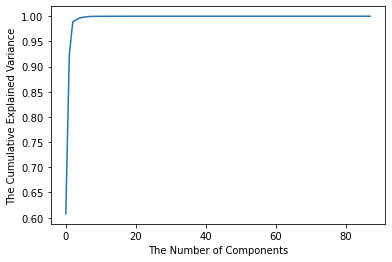

In [38]:
pca_dimension_kept = PCA().fit(Home_Def_Receive)
plt.plot(np.cumsum(pca_dimension_kept.explained_variance_ratio_))
plt.xlabel('The Number of Components')
plt.ylabel('The Cumulative Explained Variance')

In [39]:
vec_explnd_var_ratio = pca_dimension_kept.explained_variance_ratio_.cumsum()
itemindex = np.where(vec_explnd_var_ratio >= 0.95)
dimension_kept = itemindex[0][0]+1
print("The number of components which has 95% cumulative explained variance is:", dimension_kept)

The number of components which has 95% cumulative explained variance is: 3


In [40]:
pca_dimension_redc = PCA(n_components=dimension_kept)
pca_dimension_redc.fit(Home_Def_Receive)
Home_Def_Receive_PCA = pca_dimension_redc.transform(Home_Def_Receive)
print("The size of this transformed dataset is:", Home_Def_Receive_PCA.shape)
print(Home_Def_Receive_PCA)

The size of this transformed dataset is: (2304, 3)
[[  43.6076851  -617.62002591  227.9454429 ]
 [-231.91405315  860.10955481 -296.02729765]
 [ 249.92155329  -23.37385607 -289.87467135]
 ...
 [ -26.23579754 -742.0852612    99.85125634]
 [-576.25494686  250.07626504   21.92894786]
 [-185.8455248  -316.73444601   10.6345935 ]]


### 10. Away_Rush.csv

In [41]:
Away_Rush = pd.read_csv("Away_Rush.csv")
Away_Rush = Away_Rush.set_index('game_id')
Away_Rush

,Away_rushing_1,Away_rushing_2,Away_rushing_3,Away_rushing_4,Away_rushing_5,Away_rushing_6,Away_rushing_7,Away_rushing_8,Away_rushing_9,Away_rushing_10,...,Away_rushing_17,Away_rushing_18,Away_rushing_19,Away_rushing_20,Away_rushing_21,Away_rushing_22,Away_rushing_23,Away_rushing_24,Away_rushing_25,Away_rushing_26
game_id,,,,,,,,,,,,,,,,,,,,,
2009091306,490,166,2.951807,2721,5.553061,16.391566,15,20,1.333333,17.648696,...,0.120482,0.106317,1.134901,0.006837,0.395918,0.002316,0.549717,10.736689,0.021912,0.064679
2009091300,446,162,2.753086,1939,4.347534,11.969136,9,20,2.222222,-65.678986,...,0.123457,-0.405426,-1.400801,-0.008647,0.437220,-0.003141,0.404648,-5.146922,-0.011540,-0.031771
2009092004,405,165,2.454545,1629,4.022222,9.872727,7,9,1.285714,-42.926134,...,0.054545,-0.260158,-1.003413,-0.006081,0.360494,-0.002478,0.435726,-0.205343,-0.000507,-0.001245
2009092000,419,154,2.720779,2141,5.109785,13.902597,8,14,1.750000,3.986511,...,0.090909,0.025886,1.373179,0.008917,0.465394,0.003277,0.583108,2.361836,0.005637,0.015337
2009091000,593,180,3.294444,2776,4.681282,15.422222,9,22,2.444444,4.166836,...,0.122222,0.023149,0.595828,0.003310,0.419899,0.001005,0.527827,4.124703,0.006956,0.022915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010091906,424,148,2.864865,2111,4.978774,14.263514,7,23,3.285714,20.225169,...,0.155405,0.136657,1.578496,0.010666,0.445755,0.003723,0.604730,4.779948,0.011273,0.032297
2010091210,472,158,2.987342,2063,4.370763,13.056962,8,12,1.500000,-37.121809,...,0.075949,-0.234948,-0.740254,-0.004685,0.381356,-0.001568,0.463200,0.686956,0.001455,0.004348
2010091913,395,160,2.468750,1426,3.610127,8.912500,11,6,0.545455,-73.358948,...,0.037500,-0.458493,-1.985677,-0.012410,0.359494,-0.005027,0.353517,-3.906811,-0.009891,-0.024418


In [42]:
Away_Rush.replace([np.inf, -np.inf], 0, inplace=True)

Text(0, 0.5, 'The Cumulative Explained Variance')

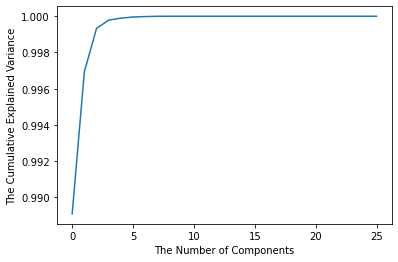

In [43]:
pca_dimension_kept = PCA().fit(Away_Rush)
plt.plot(np.cumsum(pca_dimension_kept.explained_variance_ratio_))
plt.xlabel('The Number of Components')
plt.ylabel('The Cumulative Explained Variance')

In [44]:
vec_explnd_var_ratio = pca_dimension_kept.explained_variance_ratio_.cumsum()
itemindex = np.where(vec_explnd_var_ratio >= 0.95)
dimension_kept = itemindex[0][0]+1
print("The number of components which has 95% cumulative explained variance is:", dimension_kept)

The number of components which has 95% cumulative explained variance is: 1


In [45]:
pca_dimension_redc = PCA(n_components=dimension_kept)
pca_dimension_redc.fit(Away_Rush)
Away_Rush_PCA = pca_dimension_redc.transform(Away_Rush)
print("The size of this transformed dataset is:", Away_Rush_PCA.shape)
print(Away_Rush_PCA)

The size of this transformed dataset is: (2304, 1)
[[ 891.63337522]
 [ 106.91135705]
 [-204.29830193]
 ...
 [-408.32626446]
 [ 383.81321079]
 [-445.31370272]]


### 11. Away_Receive.csv

In [46]:
Away_Receive = pd.read_csv("Away_Receive.csv")
Away_Receive = Away_Receive.set_index('game_id')
Away_Receive

,Away_receiving_1,Away_receiving_2,Away_receiving_3,Away_receiving_4,Away_receiving_5,Away_receiving_6,Away_receiving_7,Away_receiving_8,Away_receiving_9,Away_receiving_10,...,Away_receiving_79,Away_receiving_80,Away_receiving_81,Away_receiving_82,Away_receiving_83,Away_receiving_84,Away_receiving_85,Away_receiving_86,Away_receiving_87,Away_receiving_88
game_id,,,,,,,,,,,,,,,,,,,,,
2009092013,476,271,157,3.031847,1.726115,3111,19.815287,1328,11.479705,6.535714,...,-0.079604,0.193288,0.434874,0.390756,0.605042,0.296218,0.415966,0.369748,0.594538,0.287815
2009091309,553,377,165,3.351515,2.284848,4443,26.927273,2103,11.785146,8.034358,...,-0.046730,0.647526,0.558770,0.518987,0.567812,0.352622,0.555154,0.508137,0.566004,0.352622
2009091306,581,317,176,3.301136,1.801136,3526,20.034091,1702,11.123028,6.068847,...,-0.065465,0.062729,0.445783,0.407917,0.555938,0.240964,0.414802,0.370052,0.537005,0.234079
2009091310,548,347,162,3.382716,2.141975,4493,27.734568,2295,12.948127,8.198905,...,-0.069560,0.410461,0.516423,0.479927,0.567518,0.328467,0.490876,0.447080,0.560219,0.322993
2009092100,393,211,160,2.456250,1.318750,2621,16.381250,1059,12.421801,6.669211,...,-0.074897,-0.231568,0.440204,0.394402,0.605598,0.284987,0.427481,0.384224,0.603053,0.287532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010091907,535,388,154,3.474026,2.519481,4369,28.370130,2369,11.260309,8.166355,...,-0.048029,2.162545,0.609346,0.568224,0.467290,0.314019,0.598131,0.555140,0.459813,0.308411
2010092000,476,289,159,2.993711,1.817610,3100,19.496855,1308,10.726644,6.512605,...,-0.064723,0.264936,0.436975,0.401261,0.598739,0.296218,0.415966,0.380252,0.594538,0.294118
2010091205,598,339,183,3.267760,1.852459,4038,22.065574,1449,11.911504,6.752508,...,-0.083561,0.076295,0.429766,0.396321,0.643813,0.329431,0.397993,0.361204,0.622074,0.312709


In [47]:
Away_Receive.replace([np.inf, -np.inf], 0, inplace=True)

Text(0, 0.5, 'The Cumulative Explained Variance')

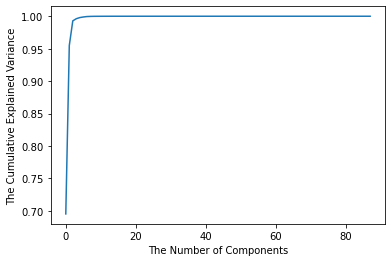

In [48]:
pca_dimension_kept = PCA().fit(Away_Receive)
plt.plot(np.cumsum(pca_dimension_kept.explained_variance_ratio_))
plt.xlabel('The Number of Components')
plt.ylabel('The Cumulative Explained Variance')

In [49]:
vec_explnd_var_ratio = pca_dimension_kept.explained_variance_ratio_.cumsum()
itemindex = np.where(vec_explnd_var_ratio >= 0.95)
dimension_kept = itemindex[0][0]+1
print("The number of components which has 95% cumulative explained variance is:", dimension_kept)

The number of components which has 95% cumulative explained variance is: 2


In [50]:
pca_dimension_redc = PCA(n_components=dimension_kept)
pca_dimension_redc.fit(Away_Receive)
Away_Receive_PCA = pca_dimension_redc.transform(Away_Receive)
print("The size of this transformed dataset is:", Away_Receive_PCA.shape)
print(Away_Receive_PCA)

The size of this transformed dataset is: (2304, 2)
[[ 1132.66303042  -395.97997282]
 [ -332.40364417   682.83422485]
 [  363.4273353   -324.70839325]
 ...
 [ -710.26682556 -1150.62928692]
 [  889.73793444   -19.69739532]
 [  833.60124311   159.64093646]]


### 12. Away_Def_Receive.csv

In [51]:
Away_Def_Receive = pd.read_csv("Away_Def_Receive.csv")
Away_Def_Receive = Away_Def_Receive.set_index('game_id')
Away_Def_Receive

,Away_def_receiving_1,Away_def_receiving_2,Away_def_receiving_3,Away_def_receiving_4,Away_def_receiving_5,Away_def_receiving_6,Away_def_receiving_7,Away_def_receiving_8,Away_def_receiving_9,Away_def_receiving_10,...,Away_def_receiving_79,Away_def_receiving_80,Away_def_receiving_81,Away_def_receiving_82,Away_def_receiving_83,Away_def_receiving_84,Away_def_receiving_85,Away_def_receiving_86,Away_def_receiving_87,Away_def_receiving_88
game_id,,,,,,,,,,,,,,,,,,,,,
2009091000,603,401,170,3.547059,2.358824,4361,25.652941,1962,10.875312,7.232172,...,-0.049002,0.562105,0.520730,0.482587,0.512438,0.290216,0.517413,0.472637,0.502488,0.288557
2009091312,537,341,166,3.234940,2.054217,3812,22.963855,1860,11.178886,7.098696,...,-0.046341,0.398960,0.513966,0.469274,0.523277,0.286778,0.500931,0.450652,0.506518,0.279330
2009091309,544,371,167,3.257485,2.221557,4370,26.167665,2104,11.778976,8.033088,...,-0.049881,0.966582,0.549632,0.523897,0.522059,0.312500,0.534926,0.516544,0.523897,0.316176
2009091306,572,344,169,3.384615,2.035503,3908,23.124260,1919,11.360465,6.832168,...,-0.065637,0.406868,0.480769,0.440559,0.536713,0.279720,0.459790,0.403846,0.522727,0.267483
2009092010,503,259,173,2.907514,1.497110,2747,15.878613,1249,10.606178,5.461233,...,-0.076686,-0.020153,0.397614,0.357853,0.582505,0.234592,0.387674,0.345924,0.582505,0.238569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010091212,557,329,168,3.315476,1.958333,3937,23.434524,1906,11.966565,7.068223,...,-0.064733,0.254148,0.511670,0.454219,0.529623,0.272890,0.486535,0.425494,0.529623,0.276481
2010091205,573,370,156,3.673077,2.371795,3904,25.025641,1724,10.551351,6.813264,...,-0.084252,0.129912,0.511344,0.485166,0.539267,0.293194,0.506108,0.471204,0.527051,0.287958
2010091202,566,343,182,3.109890,1.884615,3842,21.109890,1669,11.201166,6.787986,...,-0.066379,0.157901,0.468198,0.443463,0.558304,0.280919,0.462898,0.432862,0.556537,0.282686


In [52]:
Away_Def_Receive.replace([np.inf, -np.inf], 0, inplace=True)

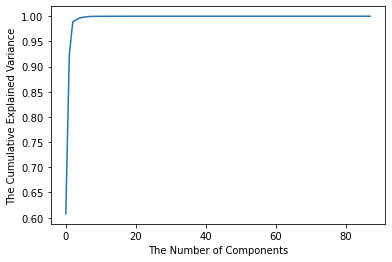

In [53]:
pca_dimension_kept = PCA().fit(Away_Def_Receive)
plt.plot(np.cumsum(pca_dimension_kept.explained_variance_ratio_))
plt.xlabel('The Number of Components')
plt.ylabel('The Cumulative Explained Variance');

In [54]:
vec_explnd_var_ratio = pca_dimension_kept.explained_variance_ratio_.cumsum()
itemindex = np.where(vec_explnd_var_ratio >= 0.95)
dimension_kept = itemindex[0][0]+1
print("The number of components which has 95% cumulative explained variance is:", dimension_kept)

The number of components which has 95% cumulative explained variance is: 3


In [55]:
pca_dimension_redc = PCA(n_components=dimension_kept)
pca_dimension_redc.fit(Away_Def_Receive)
Away_Def_Receive_PCA = pca_dimension_redc.transform(Away_Def_Receive)
print("The size of this transformed dataset is:", Away_Def_Receive_PCA.shape)
print(Away_Def_Receive_PCA)

The size of this transformed dataset is: (2304, 3)
[[ 348.06379582  383.05929967  108.91967889]
 [-390.77659504  244.39587899 -119.79691108]
 [  95.85116387  770.95312125   86.20611907]
 ...
 [ -73.27204481 -195.49571538   -1.87782322]
 [  19.84690815  140.3973662  -171.61337271]
 [-453.39246182  110.36715485 -216.38057079]]


### 12 datasets from PCA is listed as follows.

In [56]:
Away_Def_Pass_PCA
Away_Def_Rush_PCA
Away_Def_Receive_PCA

Away_Pass_PCA
Away_Rush_PCA
Away_Receive_PCA

Home_Pass_PCA
Home_Rush_PCA
Home_Receive_PCA

Home_Def_Pass_PCA
Home_Def_Rush_PCA
Home_Def_Receive_PCA

array([[  43.6076851 , -617.62002591,  227.9454429 ],
       [-231.91405315,  860.10955481, -296.02729765],
       [ 249.92155329,  -23.37385607, -289.87467135],
       ...,
       [ -26.23579754, -742.0852612 ,   99.85125634],
       [-576.25494686,  250.07626504,   21.92894786],
       [-185.8455248 , -316.73444601,   10.6345935 ]])